In [ ]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 

## Save data as a file

In [ ]:
# Preprocessing
# preprocessing = Preprocessing()
# input_df = preprocessing.get_data_table_from_DB()
# input_df.to_csv('input_df_all.csv')

## DNN

In [ ]:
# Preprocessing
preprocessing = Preprocessing()
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'TF_order', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_DNN_classification(
    input_df, ['UltimateCharge'], target=['TF_winner'])

In [ ]:
# set model
dnn = Modeling.ModelDNN(X=X, y=y)
dnn.create_model()

In [ ]:
# training
dnn.train_model(num_epoch=3000, batch_size=3000, patience=300)

## LSTM

In [1]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 
from matplotlib import pyplot as plt

In [2]:
# Preprocessing
time_shift = 10
preprocessing = Preprocessing()
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_LSTM(
    input_df, time_shift=time_shift, features=['Position_x', 'Position_y', 'Position_z'], target=['RCP'])

100%|██████████| 24/24 [12:19<00:00, 30.81s/it]
#nan in df_X:  0
#nan in df_y:  0
#nan in df_X:                Team  Player
Hero_Ana      0     0         0
                    1         0
                    2         0
                    3         0
                    4         0
                             ..
Position_z_9  1     1         0
                    2         0
                    3         0
                    4         0
                    5         0
Length: 3720, dtype: int64
#nan in df_y:  0    0
dtype: int64
X shape: (97111, 3720)
y shape: (97111, 1)


In [3]:
# set model
lstm = Modeling.ModelLSTM(X=X, y=y, time_shift=time_shift)
lstm.create_model()

X_train shape :  (65064, 3720)
y_train shape :  (65064, 1)
X_test shape :  (32047, 3720)
y_test shape :  (32047, 1)
-------Reshape-----------
input shape: (65064, 3720)
input shape: (32047, 3720)
X_train reshape :  (65064, 10, 372)
X_test reshape :  (32047, 10, 372)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                84600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)              

 - val_loss: 0.0085
Epoch 698/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0085 - val_loss: 0.0085
Epoch 699/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0083 - val_loss: 0.0085
Epoch 700/3000
65064/65064 [==============================] - 4s 58us/sample - loss: 0.0085 - val_loss: 0.0084
Epoch 701/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0083 - val_loss: 0.0082
Epoch 702/3000
65064/65064 [==============================] - 4s 59us/sample - loss: 0.0083 - val_loss: 0.0084
Epoch 703/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0084 - val_loss: 0.0083
Epoch 704/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0084 - val_loss: 0.0086
Epoch 705/3000
65064/65064 [==============================] - 4s 56us/sample - loss: 0.0084 - val_loss: 0.0085
Epoch 706/3000
65064/65064 [==============================] - 4s 55us/sample - loss: 0.0086 

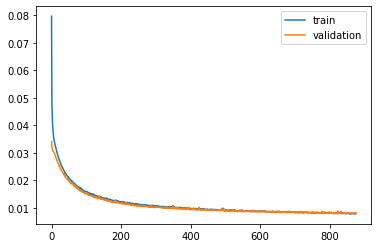

In [4]:
# training
lstm.train_model(num_epoch=3000, batch_size=3000, patience=300)

In [5]:
# evaluate model
ev = lstm.evaluate_model(lstm.X_test, lstm.y_test)

NameError: name 'model' is not defined